In [2]:
import sys
sys.path.append('../scripts')
from clean_data import clean_dataset


In [3]:
df = clean_dataset('../data/raw/data110-dataset.csv')


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             78 non-null     object 
 1   Region                              78 non-null     object 
 2   antimicrobial_mg_per_population     78 non-null     float64
 3   kilograms_eggs_per_year_per_capita  77 non-null     float64
 4   expected_schooling_years            75 non-null     float64
 5   ibs_rate_2017                       76 non-null     float64
 6   kilograms_meat_per_year_per_capita  77 non-null     float64
 7   kilograms_milk_per_year_per_capita  77 non-null     float64
 8   PercentResistant                    78 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.6+ KB


,Country,Region,antimicrobial_mg_per_population,kilograms_eggs_per_year_per_capita,expected_schooling_years,ibs_rate_2017,kilograms_meat_per_year_per_capita,kilograms_milk_per_year_per_capita,PercentResistant
0,Argentina,Latin America and the Caribbean,63.10585,15.86571,18.980,43.7,113.51550,173.3000,0.34
1,Australia,East Asia and Pacific,165.06090,7.08362,21.080,37.9,112.23890,212.9982,0.16
2,Austria,Europe and Central Asia,17.48986,14.76347,16.367,83.6,76.88444,209.2823,0.15
3,Belarus,Europe and Central Asia,69.55221,13.41905,13.982,115.9,98.18464,121.5822,0.42
4,Belgium,Europe and Central Asia,40.13702,19.33341,18.946,93.9,64.54818,184.0729,0.19


In [5]:
# Save the cleaned dataset
df.to_csv('../data/processed/data110-dataset-cleaned.csv', index=False)

In [6]:
import pandas as pd

df = pd.read_csv('../data/processed/data110-dataset-cleaned.csv')

# Quick check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             78 non-null     object 
 1   Region                              78 non-null     object 
 2   antimicrobial_mg_per_population     78 non-null     float64
 3   kilograms_eggs_per_year_per_capita  77 non-null     float64
 4   expected_schooling_years            75 non-null     float64
 5   ibs_rate_2017                       76 non-null     float64
 6   kilograms_meat_per_year_per_capita  77 non-null     float64
 7   kilograms_milk_per_year_per_capita  77 non-null     float64
 8   PercentResistant                    78 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.6+ KB


,Country,Region,antimicrobial_mg_per_population,kilograms_eggs_per_year_per_capita,expected_schooling_years,ibs_rate_2017,kilograms_meat_per_year_per_capita,kilograms_milk_per_year_per_capita,PercentResistant
0,Argentina,Latin America and the Caribbean,63.10585,15.86571,18.980,43.7,113.51550,173.3000,0.34
1,Australia,East Asia and Pacific,165.06090,7.08362,21.080,37.9,112.23890,212.9982,0.16
2,Austria,Europe and Central Asia,17.48986,14.76347,16.367,83.6,76.88444,209.2823,0.15
3,Belarus,Europe and Central Asia,69.55221,13.41905,13.982,115.9,98.18464,121.5822,0.42
4,Belgium,Europe and Central Asia,40.13702,19.33341,18.946,93.9,64.54818,184.0729,0.19


In [7]:
#check for missing vals
# Check missing values per column
print(df.isna().sum())


Country                               0
Region                                0
antimicrobial_mg_per_population       0
kilograms_eggs_per_year_per_capita    1
expected_schooling_years              3
ibs_rate_2017                         2
kilograms_meat_per_year_per_capita    1
kilograms_milk_per_year_per_capita    1
PercentResistant                      0
dtype: int64


In [8]:
print(df.describe())


       antimicrobial_mg_per_population  kilograms_eggs_per_year_per_capita  \
count                        78.000000                           77.000000   
mean                         62.794130                            9.821217   
std                          55.649337                            6.399400   
min                           4.339035                            0.316326   
25%                          22.025018                            4.381492   
50%                          55.155015                            9.898994   
75%                          81.657595                           13.419050   
max                         337.777300                           32.451060   

       expected_schooling_years  ibs_rate_2017  \
count                 75.000000      76.000000   
mean                  14.816747      61.097368   
std                    3.120658      56.224815   
min                    5.635000       8.800000   
25%                   12.778500      15.900000 

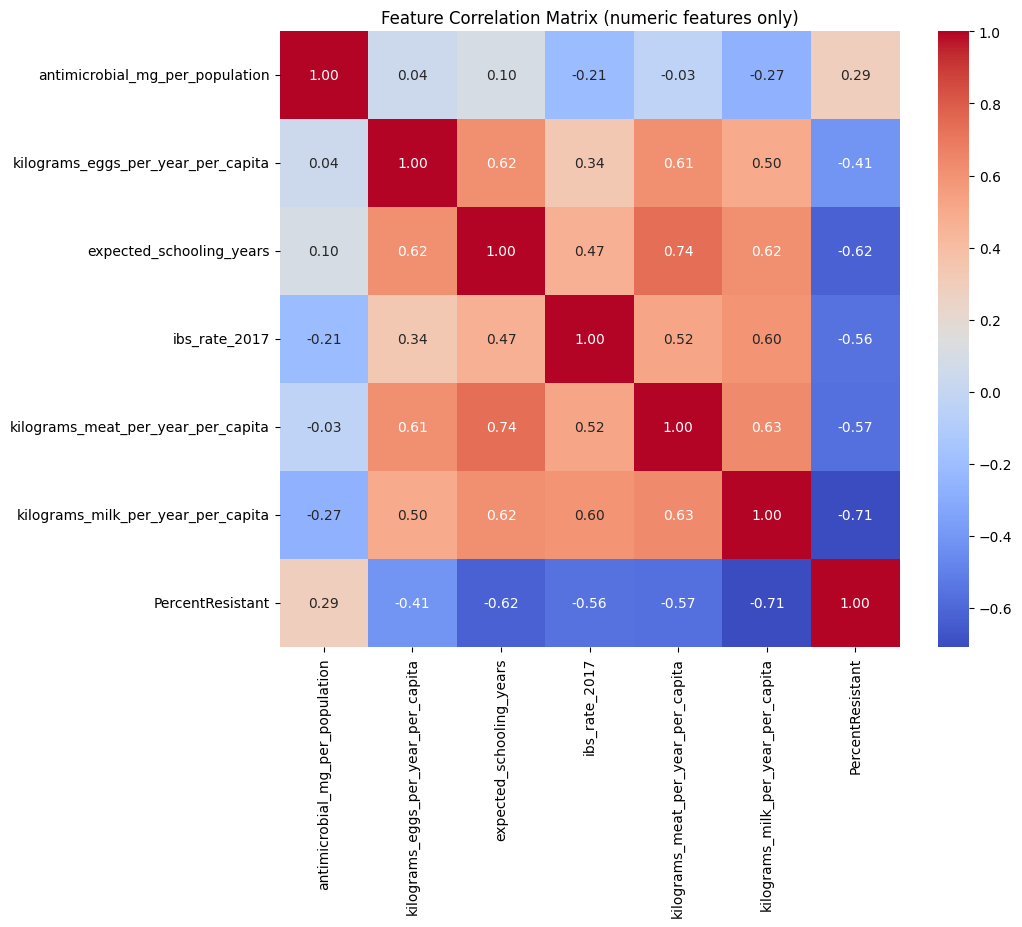

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap ONLY for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix (numeric features only)')
plt.show()
